In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
X_train = pd.read_csv("cmf-2022-bank-scoring-case/X_train.csv")
y_train = pd.read_csv("cmf-2022-bank-scoring-case/y_train.csv")

X_test = pd.read_csv("cmf-2022-bank-scoring-case/X_test.csv")
y_test = pd.read_csv("cmf-2022-bank-scoring-case/y_test_sample.csv")

In [3]:
X_train

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0
...,...,...,...,...,...,...,...,...,...,...
105104,0.017608,62,0,0.184589,9928.125255,6,0,2,0,0.0
105105,0.980631,25,0,0.158753,2187.355843,3,0,0,0,0.0
105106,0.050256,73,1,0.849711,3961.841113,12,0,2,0,0.0
105107,0.447882,43,0,0.068033,3705.546719,4,0,0,1,0.0


In [4]:
y_train

,target
0,0
1,0
2,0
3,0
4,0
...,...
105104,0
105105,0
105106,0
105107,0


In [5]:
y_train.value_counts(normalize=True)

target
0         0.933108
1         0.066892
dtype: float64

In [6]:
X_train

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0
...,...,...,...,...,...,...,...,...,...,...
105104,0.017608,62,0,0.184589,9928.125255,6,0,2,0,0.0
105105,0.980631,25,0,0.158753,2187.355843,3,0,0,0,0.0
105106,0.050256,73,1,0.849711,3961.841113,12,0,2,0,0.0
105107,0.447882,43,0,0.068033,3705.546719,4,0,0,1,0.0


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105109 entries, 0 to 105108
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   credit_card_utilization     105109 non-null  float64
 1   age                         105109 non-null  int64  
 2   overdue_30_59_days          105109 non-null  int64  
 3   debt_to_income              105109 non-null  float64
 4   monthly_income              84116 non-null   float64
 5   credits_loans               105109 non-null  int64  
 6   overdue__more_than_90_days  105109 non-null  int64  
 7   mortgage_loans              105109 non-null  int64  
 8   overdue_60_89_days          105109 non-null  int64  
 9   family_members              102304 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 8.0 MB


In [8]:
X_train['y'] = y_train['target']

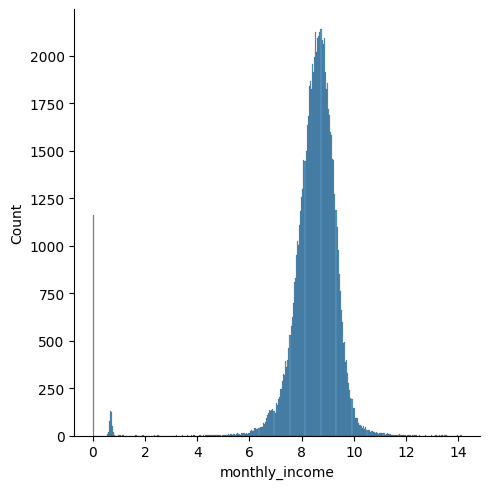

In [9]:
sns.displot(np.log1p(X_train['monthly_income']))

In [10]:
X_train.shape

(105109, 11)

let's remove tails:

In [11]:
X_train = X_train[(np.log1p(X_train['monthly_income']).quantile(0.05) < np.log1p(X_train['monthly_income'])) & (np.log1p(X_train['monthly_income']) < np.log1p(X_train['monthly_income']).quantile(0.99))]

In [12]:
X_train.shape

(79068, 11)

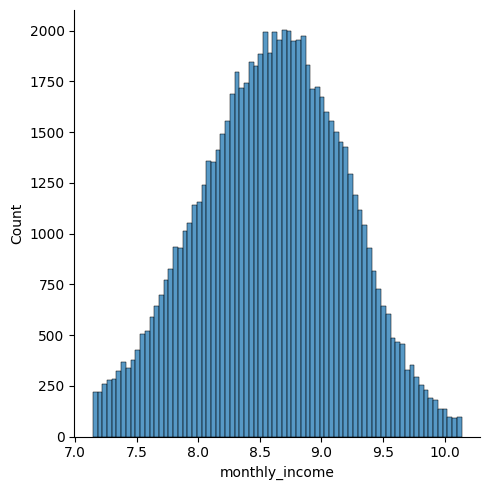

In [13]:
sns.displot(np.log1p(X_train['monthly_income']))

In [14]:
X_train.isnull().sum().sum()

0

In [15]:
y_train = X_train['y']
X_train = X_train.drop('y', axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

1. Naive Bayes
2. Logistic Regression
3. K-Nearest Neighbours
4. Support Vector Machine
5. Decision Tree
6. Bagging Decision Tree (Ensemble Learning I)
7. Boosted Decision Tree (Ensemble Learning II)
8. Random Forest (Ensemble Learning III)
9. Neural Network (Deep Learning)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

1. Naive Bayes (Gaussian Naive Bayes)

In [19]:
from sklearn.naive_bayes import GaussianNB
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', GaussianNB())])

pipe.fit(X_train, y_train)
y_train_proba = pipe.predict_proba(X_train)[:,1]
y_pred_proba = pipe.predict_proba(X_val)[:,1]

print(f"Train score = {roc_auc_score(y_train, y_train_proba)}")
print(f"Test score = {roc_auc_score(y_val, y_pred_proba)}")

Train score = 0.7386313621180627
Test score = 0.7467121669092567


2. Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('LogisticRegression', LogisticRegression())])

pipe.fit(X_train, y_train)
y_train_proba = pipe.predict_proba(X_train)[:,1]
y_pred_proba = pipe.predict_proba(X_val)[:,1]

print(f"Train score = {roc_auc_score(y_train, y_train_proba)}")
print(f"Test score = {roc_auc_score(y_val, y_pred_proba)}")

Train score = 0.7000694248446074
Test score = 0.6972438523135848


3. K-Nearest Neighbours

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=2))])

pipe.fit(X_train, y_train)

y_train_proba = pipe.predict_proba(X_train)[:,1]
y_pred_proba = pipe.predict_proba(X_val)[:,1]

print(f"Train score = {roc_auc_score(y_train, y_train_proba)}")
print(f"Test score = {roc_auc_score(y_val, y_pred_proba)}")

Train score = 0.9809623889195355
Test score = 0.6127720327388437


4. Support Vector Machine 

In [44]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [46]:
from sklearn.svm import SVC
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('SVC', SVC(probability=True))])

pipe.fit(X_train, y_train)

y_train_proba = pipe.predict_proba(X_train)[:,1]
y_pred_proba = pipe.predict_proba(X_val)[:,1]

print(f"Train score = {roc_auc_score(y_train, y_train_proba)}")
print(f"Test score = {roc_auc_score(y_val, y_pred_proba)}")

Train score = 0.7075776985818178
Test score = 0.6640203960464951


5. Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())])

pipe.fit(X_train, y_train)
y_train_proba = pipe.predict_proba(X_train)[:,1]
y_pred_proba = pipe.predict_proba(X_val)[:,1]

print(f"Train score = {roc_auc_score(y_train, y_train_proba)}")
print(f"Test score = {roc_auc_score(y_val, y_pred_proba)}")

Train score = 1.0
Test score = 0.604615455841177


6. Bagging Decision Tree (Ensemble Learning I)

In [23]:
from sklearn.ensemble import BaggingClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('Bagging Decision Tree', BaggingClassifier(base_estimator=DecisionTreeClassifier()))])

pipe.fit(X_train, y_train)
y_train_proba = pipe.predict_proba(X_train)[:,1]
y_pred_proba = pipe.predict_proba(X_val)[:,1]

print(f"Train score = {roc_auc_score(y_train, y_train_proba)}")
print(f"Test score = {roc_auc_score(y_val, y_pred_proba)}")


Train score = 0.999583956769996
Test score = 0.7642710220587947


7. Boosting (Gradient boosting classifier and XGB)

In [18]:
import xgboost as xgb
import optuna

/Users/hayk/.pyenv/versions/3.10.6/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [106]:
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('GradientBoostingClassifier', GradientBoostingClassifier())])

pipe.fit(X_train, y_train)
y_train_proba = pipe.predict_proba(X_train)[:,1]
y_pred_proba = pipe.predict_proba(X_val)[:,1]

print(f"Train score = {roc_auc_score(y_train, y_train_proba)}")
print(f"Test score = {roc_auc_score(y_val, y_pred_proba)}")

Train score = 0.8640293910542141
Test score = 0.8505737305610518


In [19]:
def objective(trial):
    trial.suggest_categorical('n_estimators', [100])
    trial.suggest_float('learning_rate', 0.001, 0.5, log=True)
    trial.suggest_int('max_depth', 3, 11)
    trial.suggest_int('min_child_weight', 3, 11)
    trial.suggest_float('subsample', 0.1, 1.)
    trial.suggest_float('colsample_bytree', 0.1, 1.)
    trial.suggest_categorical('eval_metric', ['logloss'])
    
    model = xgb.XGBClassifier(**trial.params)
    model.fit(X_train, y_train)
    
    y_pred_proba = model.predict_proba(X_val)[:,1]

    return roc_auc_score(y_val, y_pred_proba)


study = optuna.create_study(
    study_name='xgboost classifier tuning',
    direction='maximize'
)

study.optimize(objective, n_trials=50)

[I 2023-02-12 14:19:21,940] A new study created in memory with name: xgboost classifier tuning
[I 2023-02-12 14:19:23,031] Trial 0 finished with value: 0.8431340239171653 and parameters: {'n_estimators': 100, 'learning_rate': 0.02674561562978562, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.3850991334457522, 'colsample_bytree': 0.9919933959815498, 'eval_metric': 'logloss'}. Best is trial 0 with value: 0.8431340239171653.
[I 2023-02-12 14:19:24,102] Trial 1 finished with value: 0.8516817907924799 and parameters: {'n_estimators': 100, 'learning_rate': 0.06945649688918477, 'max_depth': 5, 'min_child_weight': 6, 'subsample': 0.45834320938551076, 'colsample_bytree': 0.33460458008847105, 'eval_metric': 'logloss'}. Best is trial 1 with value: 0.8516817907924799.
[I 2023-02-12 14:19:25,956] Trial 2 finished with value: 0.8515878817620416 and parameters: {'n_estimators': 100, 'learning_rate': 0.03174663950348449, 'max_depth': 8, 'min_child_weight': 5, 'subsample': 0.4477793131719098, '

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_proba = model_rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred_proba)


0.8111940315996868

In [35]:
n_estimators_rf = [int(x) for x in np.linspace(200, 1000, 5)]
max_depth_rf = [int(x) for x in np.linspace(10, 110, 4)]

params_rf = dict(n_estimators = n_estimators_rf, max_depth = max_depth_rf)
grid_rf = GridSearchCV(model_rf, params_rf, cv=2, scoring='roc_auc', verbose=1)
grid_rf.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=800),
             param_grid={'max_depth': [10, 43, 76, 110],
                         'n_estimators': [200, 400, 600, 800]},
             scoring='roc_auc', verbose=1)

In [36]:
grid_rf.best_params_

{'max_depth': 10, 'n_estimators': 800}

In [42]:
X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)
model_rf = RandomForestClassifier(max_depth=10, n_estimators=800)
model_rf.fit(X_train, y_train)

y_pred_proba = model_rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred_proba)

0.8422742947581052

10. Neural Network

In [111]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import metrics

from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback

In [126]:
class RocCallback(Callback):
    def __init__(self, training_data, validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        # predict_prob=self.model.predict([testa, testb])
        # predict_classes = np.argmax(predict_prob,axis=1)

        y_pred_train = self.model.predict_proba(self.x)
        roc_train = roc_auc_score(self.y, y_pred_train)
        y_pred_val = self.model.predict_proba(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)), str(round(roc_val, 4))),end=100*' \n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

roc = RocCallback(training_data=(X_train, y_train),
                  validation_data=(X_test, y_test))

In [130]:
model = keras.Sequential(name="nn")
model.add(Dense(10, input_shape = (10,), activation="relu", name="layer1"))
model.add(Dense(6, activation="relu", name="layer2"))
model.add(Dense(3, activation="relu", name="layer3"))
model.add(Dense(1, activation='sigmoid', name="layer4"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC'])
model.fit(X_train, y_train, epochs=10, batch_size=10)
# model.fit(X_train, y_train, 
#           validation_data=(X_val, y_val),
#           callbacks=[roc])

Epoch 1/10
5298/5298 [==============================] - 11s 2ms/step - loss: 3.7121 - accuracy: 0.9300 - auc: 0.5603
Epoch 2/10
5298/5298 [==============================] - 8s 2ms/step - loss: 0.2535 - accuracy: 0.9302 - auc: 0.6090
Epoch 3/10
5298/5298 [==============================] - 10s 2ms/step - loss: 0.2497 - accuracy: 0.9302 - auc: 0.6203
Epoch 4/10
5298/5298 [==============================] - 10s 2ms/step - loss: 0.2460 - accuracy: 0.9302 - auc: 0.6402
Epoch 5/10
5298/5298 [==============================] - 9s 2ms/step - loss: 0.2432 - accuracy: 0.9302 - auc: 0.6594
Epoch 6/10
5298/5298 [==============================] - 8s 2ms/step - loss: 0.2417 - accuracy: 0.9302 - auc: 0.6733
Epoch 7/10
5298/5298 [==============================] - 8s 2ms/step - loss: 0.2407 - accuracy: 0.9302 - auc: 0.6942
Epoch 8/10
5298/5298 [==============================] - 8s 2ms/step - loss: 0.2241 - accuracy: 0.9302 - auc: 0.7468
Epoch 9/10
5298/5298 [==============================] - 8s 2ms/step -